# **SecuDroid - Android Malware Detection using ML Claasifiers**

## **CONTENTS**

* Data Analysis and Pre-processing
* Algorithms Used:
    * Decision Tree
    * Support Vector Machine
    * Logistic Regression
    * K - Nearest Neighbor
    * SecuDroid Neural Network
* Visualising all the accuracies in the bar-graph

In [1]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow==2.13.1 tensorflow-io==0.34.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


# **Importing and pre-processing Dataset**

In [5]:
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.metrics import precision_score,recall_score,f1_score
import tensorflow as tf
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

/var/folders/mj/zz2t97c53ds0_py7bfbm80s00000gr/T/ipykernel_53012/2223888169.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
data = pd.read_csv("~/Desktop/SecuDroid/dataset/drebin/drebin-215-dataset-5560malware-9476-benign.csv")
print("Total missing values : ",sum(list(data.isna().sum())))
data

Total missing values :  0


/var/folders/mj/zz2t97c53ds0_py7bfbm80s00000gr/T/ipykernel_53012/2941368734.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("~/Desktop/SecuDroid/dataset/drebin/drebin-215-dataset-5560malware-9476-benign.csv")


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


In [7]:
classes,count = np.unique(data['class'],return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
data = data.replace(classes,lbl_enc.fit_transform(classes))

#Dataset contains special characters like ''?' and 'S'. Set them to NaN and use dropna() to remove them
data=data.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(data.isna().sum())))
data.dropna(inplace=True)
for c in data.columns:
    data[c] = pd.to_numeric(data[c])
data

[0 1] ['B' 'S']
Total missing values :  5


/var/folders/mj/zz2t97c53ds0_py7bfbm80s00000gr/T/ipykernel_53012/410007786.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(classes,lbl_enc.fit_transform(classes))


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


In [8]:
print("Total Features : ",len(data.columns)-1)

Total Features :  215


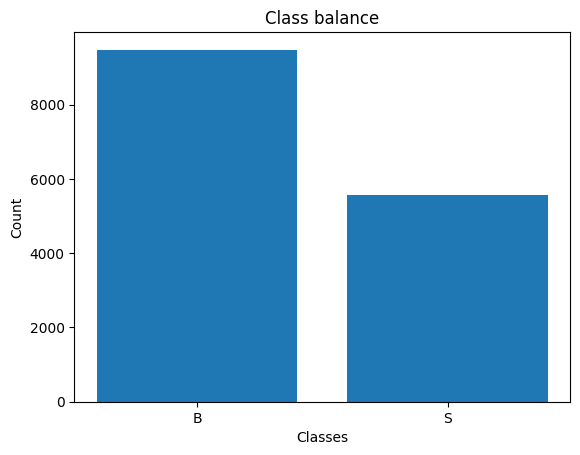

In [9]:
plt.bar(classes,count)
plt.title("Class balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

## **Balancing Dataset**

In [10]:
from sklearn.utils import resample
# Separate features and labels
X = data.drop("class", axis=1)
y = data["class"]

# Count the occurrences of each class
class_counts = y.value_counts()

# Calculate the majority and minority class labels
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Separate majority and minority class samples
majority_samples = data[data["class"] == majority_class]
minority_samples = data[data["class"] == minority_class]

# Oversample the minority class to match the majority class
minority_oversampled = resample(minority_samples,
                                 replace=True,      # Sample with replacement
                                 n_samples=len(majority_samples),  # Match majority class
                                 random_state=0)    # Set random seed for reproducibility

# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([majority_samples, minority_oversampled])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=0)

# Now, balanced_data contains the balanced dataset with equal instances of both classes

In [11]:
# Count the occurrences of each class in the balanced dataset
balanced_class_counts = balanced_data["class"].value_counts()

# Print the class counts
print(balanced_class_counts)

class
1    9476
0    9476
Name: count, dtype: int64


## **Test Split Ratio**

In [12]:
TEST_SPLIT = 0.25

## **Splitting Dataset**

In [13]:
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y = train_test_split(data[data.columns[:len(data.columns)-1]].to_numpy(),
                                                 data[data.columns[-1]].to_numpy(),
                                                  test_size = TEST_SPLIT,
                                                  shuffle=True)

In [14]:
print("Train features size : ",len(train_x))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_x))
print("Test features size : ",len(test_y))

Train features size :  11273
Train labels size :  11273
Test features size :  3758
Test features size :  3758


In [15]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (11273, 215)
Train labels :  (11273,)
Test Features :  (3758, 215)
Test labels :  (3758,)


In [16]:
train_y = train_y.reshape((-1,1))
test_y = test_y.reshape((-1,1))

In [17]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (11273, 215)
Train labels :  (11273, 1)
Test Features :  (3758, 215)
Test labels :  (3758, 1)


## **HEATMAP**

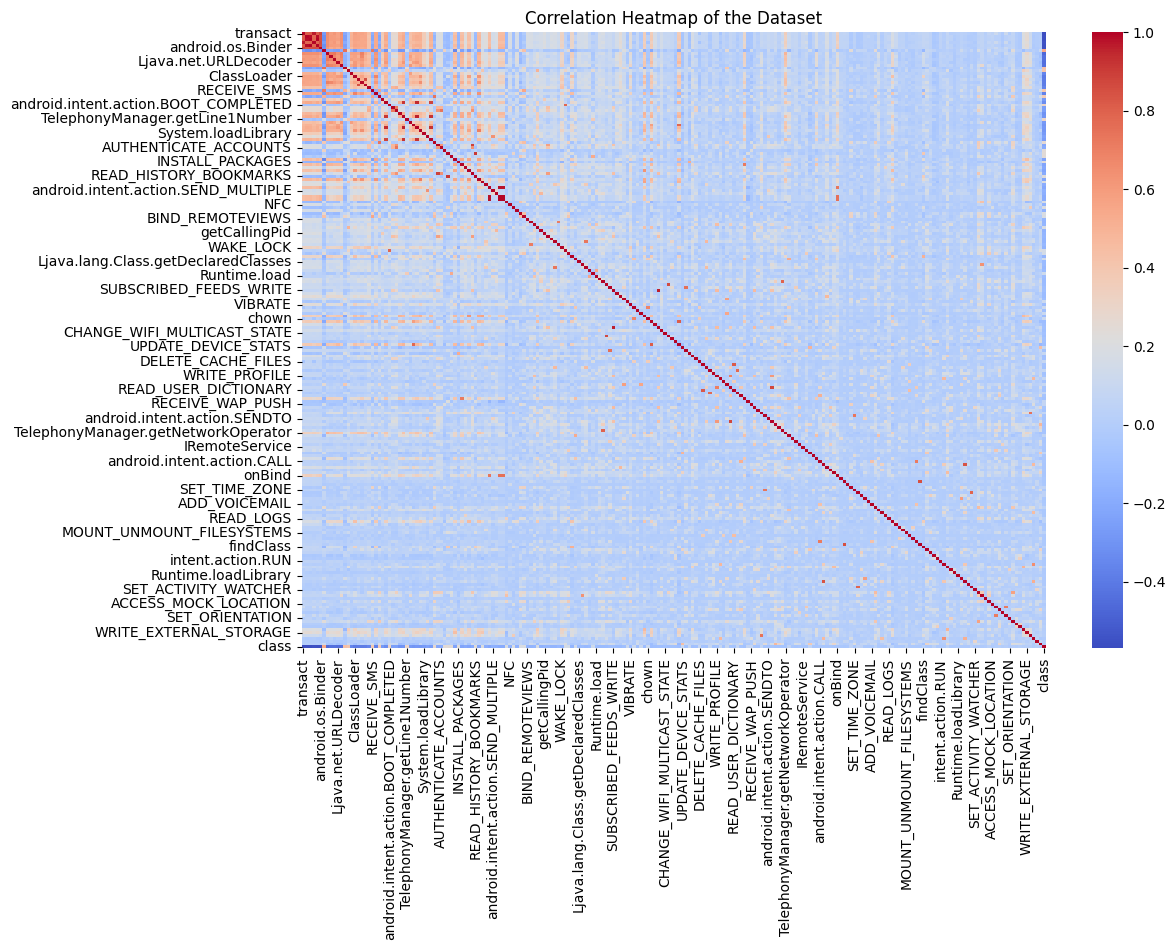

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of the Dataset")
plt.show()


## **Helper function to display all performance metrics**

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

def evaluate_classification_model(y_test, y_pred, y_prob):
    # 1. Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix.astype(float))  # Ensure all elements are treated as float for formatting
    print("\n")

    # 2. Accuracy, Precision, Recall, F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")

    # 3. ROC Curve and AUC
    if len(np.unique(y_test)) == 2:  # Check if it's a binary classification task
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
        plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()
        print(f"AUC: {auc:.4f}")
        print("\n")
    else:
        print("ROC Curve and AUC not applicable for multiclass classification.")

    # 4. Classification Report
    report = classification_report(y_test, y_pred, digits=4)
    print("Classification Report:")
    print(report)

## **DECISION TREE**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.model_selection import GridSearchCV

In [21]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variabl

# Declaring Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=28, min_samples_split=2, min_samples_leaf=1)

Confusion Matrix:
[[9289.  187.]
 [ 166. 5389.]]


Accuracy: 0.9765
Precision: 0.9665
Recall: 0.9701
F1 Score: 0.9683




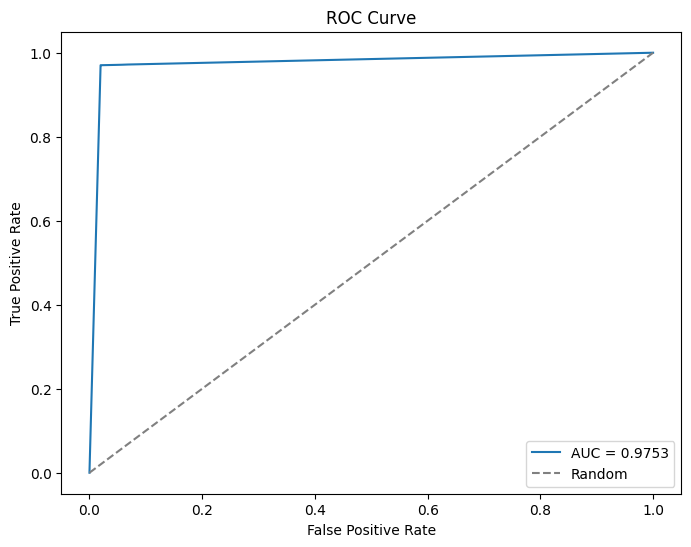

AUC: 0.9753


Classification Report:
              precision    recall  f1-score   support

           0     0.9824    0.9803    0.9814      9476
           1     0.9665    0.9701    0.9683      5555

    accuracy                         0.9765     15031
   macro avg     0.9745    0.9752    0.9748     15031
weighted avg     0.9765    0.9765    0.9765     15031



In [22]:
# Stratified 4-fold cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Perform cross-validation and get predictions
y_pred_cv = cross_val_predict(dt_clf, X, y, cv=cv, method='predict')
y_prob_cv = cross_val_predict(dt_clf, X, y, cv=cv, method='predict_proba')[:, 1]

evaluate_classification_model(y, y_pred_cv, y_prob_cv)

## **SUPPORT VECTOR MACHINE**

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict

In [24]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable
 
# Declaring Support Vector Machine Classifier
svm_clf = SVC(kernel='rbf', C=15, gamma=0.1, probability=True)

Confusion Matrix:
[[9426.   50.]
 [  95. 5460.]]


Accuracy: 0.9904
Precision: 0.9909
Recall: 0.9829
F1 Score: 0.9869




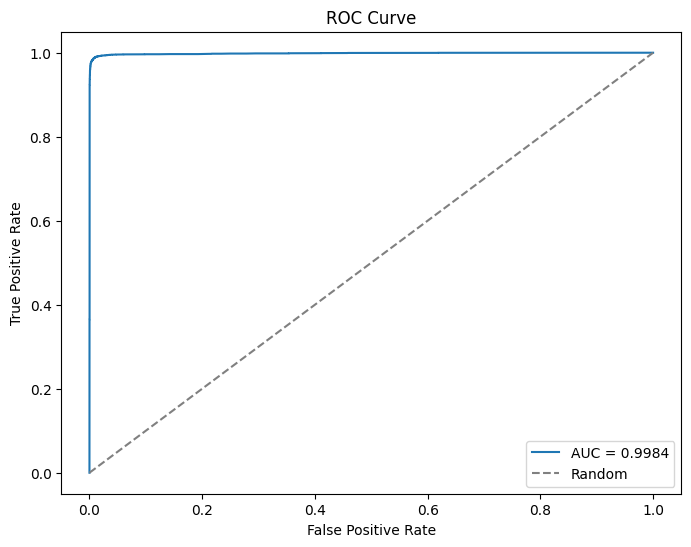

AUC: 0.9984


Classification Report:
              precision    recall  f1-score   support

           0     0.9900    0.9947    0.9924      9476
           1     0.9909    0.9829    0.9869      5555

    accuracy                         0.9904     15031
   macro avg     0.9905    0.9888    0.9896     15031
weighted avg     0.9904    0.9904    0.9903     15031



In [25]:
# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Perform cross-validation and get predictions
y_pred_cv = cross_val_predict(svm_clf, X, y, cv=cv, method='predict')
y_prob_cv = cross_val_predict(svm_clf, X, y, cv=cv, method='predict_proba')[:, 1]
evaluate_classification_model(y, y_pred_cv, y_prob_cv)

## **LOGISTIC REGRESSION**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

# Declaring Logistic Regression Classifier
lr_clf = LogisticRegression(C=5, random_state=42, max_iter=1000)

Confusion Matrix:
[[9339.  137.]
 [ 191. 5364.]]


Accuracy: 0.9782
Precision: 0.9751
Recall: 0.9656
F1 Score: 0.9703




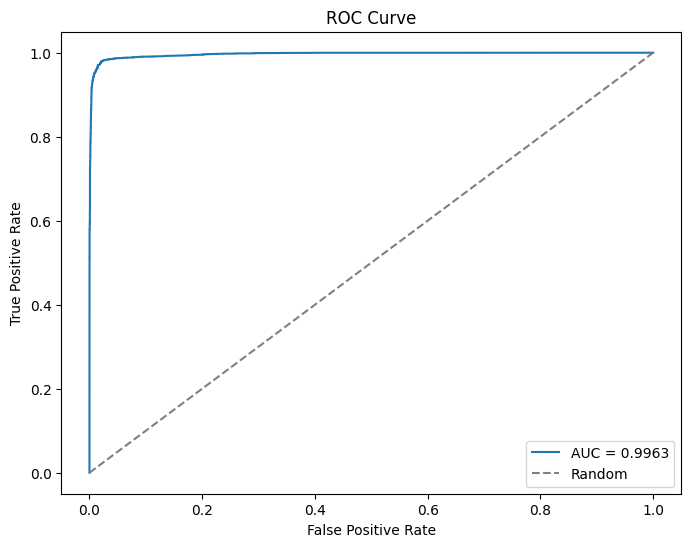

AUC: 0.9963


Classification Report:
              precision    recall  f1-score   support

           0     0.9800    0.9855    0.9827      9476
           1     0.9751    0.9656    0.9703      5555

    accuracy                         0.9782     15031
   macro avg     0.9775    0.9756    0.9765     15031
weighted avg     0.9782    0.9782    0.9782     15031



In [28]:
# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Perform cross-validation and get predictions
y_pred_cv = cross_val_predict(lr_clf, X, y, cv=cv, method='predict')
y_prob_cv = cross_val_predict(lr_clf, X, y, cv=cv, method='predict_proba')[:, 1]
evaluate_classification_model(y, y_pred_cv, y_prob_cv)

## **K - Nearest Neighbor**

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

# Declaring K-Nearest Neighbor Classifier
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance', p=1)

Confusion Matrix:
[[9376.  100.]
 [ 104. 5451.]]


Accuracy: 0.9864
Precision: 0.9820
Recall: 0.9813
F1 Score: 0.9816




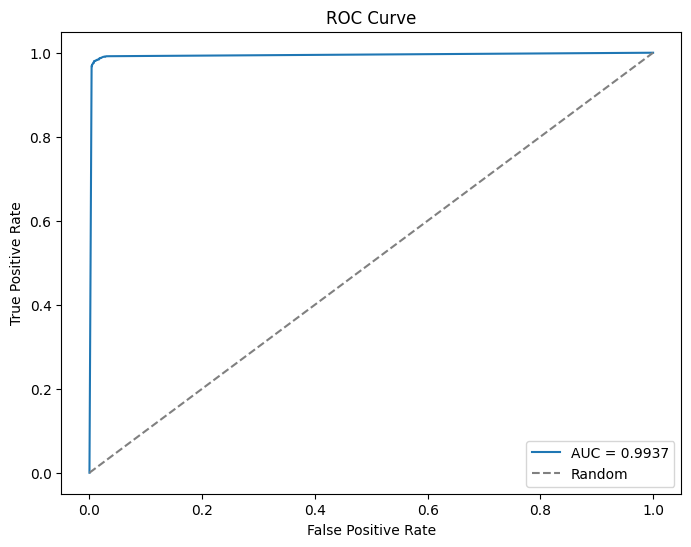

AUC: 0.9937


Classification Report:
              precision    recall  f1-score   support

           0     0.9890    0.9894    0.9892      9476
           1     0.9820    0.9813    0.9816      5555

    accuracy                         0.9864     15031
   macro avg     0.9855    0.9854    0.9854     15031
weighted avg     0.9864    0.9864    0.9864     15031



In [31]:
# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Perform cross-validation and get predictions
y_pred_cv = cross_val_predict(knn_clf, X, y, cv=cv, method='predict')
y_prob_cv = cross_val_predict(knn_clf, X, y, cv=cv, method='predict_proba')[:, 1]
evaluate_classification_model(y, y_pred_cv, y_prob_cv)

### **Helper function to plot history curve**

In [32]:
def plot_history_curve(history_obj):
    # Extracting the history records
    training_loss = history_obj.history['loss']
    validation_loss = history_obj.history['val_loss']
    accuracy_scr = history_obj.history['accuracy']
    
    # Extracting the number of epochs
    epochs = range(1, len(training_loss) + 1)
    
    # Plotting the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, training_loss, 'bo-', label='Training loss')
    plt.plot(epochs, validation_loss, 'ro-', label='Validation loss')
    plt.plot(epochs, accuracy_scr, 'go-', label='Accuracy')
    plt.title('Accuracy, Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    
    plt.show()

## **SEQUENTIAL NEURAL NETWORK**

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.models import clone_model

In [34]:
X = data.drop('class', axis=1).values  # Features
y = data['class'].values  # Target variable

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [35]:
# model = Sequential([
#     Dense(448, activation='relu', input_shape=(X.shape[1],)),
#     Dropout(0.3),
#     Dense(416, activation='relu'),
#     Dropout(0.3),
#     Dense(800, activation='relu'),
#     Dropout(0.2),
#     Dense(864, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
# ])

model = Sequential([
    Dense(448, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(416, activation='relu'),
    Dropout(0.3),
    Dense(800, activation='relu'),
    Dropout(0.2),
    Dense(864, activation='relu'),
    Dropout(0.2),
    Dense(864, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 448)               96768     
                                                                 
 dropout (Dropout)           (None, 448)               0         
                                                                 
 dense_1 (Dense)             (None, 416)               186784    
                                                                 
 dropout_1 (Dropout)         (None, 416)               0         
                                                                 
 dense_2 (Dense)             (None, 800)               333600    
                                                                 
 dropout_2 (Dropout)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 864)               6

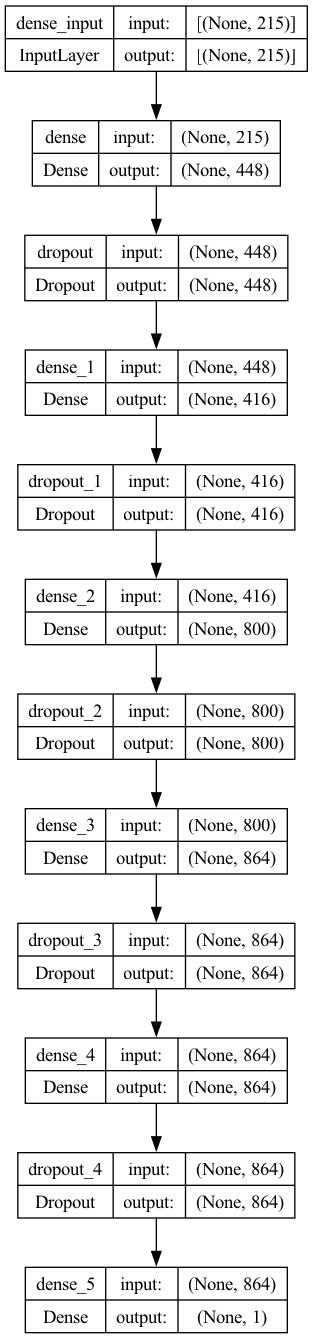

In [36]:
from keras.utils import plot_model

# Assuming your model is named 'model'
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

118/118 [==============================] - 0s 2ms/step
Confusion Matrix:
[[2353.   16.]
 [  27. 1362.]]


Accuracy: 0.9886
Precision: 0.9884
Recall: 0.9806
F1 Score: 0.9845




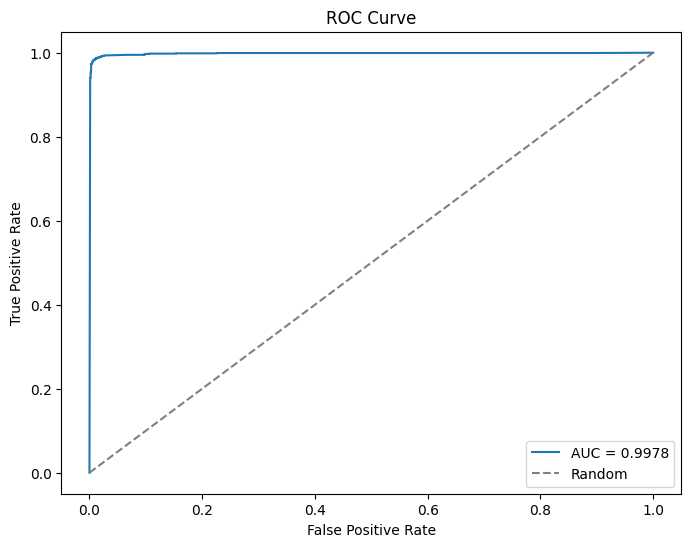

AUC: 0.9978


Classification Report:
              precision    recall  f1-score   support

           0     0.9887    0.9932    0.9909      2369
           1     0.9884    0.9806    0.9845      1389

    accuracy                         0.9886      3758
   macro avg     0.9885    0.9869    0.9877      3758
weighted avg     0.9886    0.9886    0.9885      3758

118/118 [==============================] - 0s 2ms/step
Confusion Matrix:
[[2356.   13.]
 [  16. 1373.]]


Accuracy: 0.9923
Precision: 0.9906
Recall: 0.9885
F1 Score: 0.9895




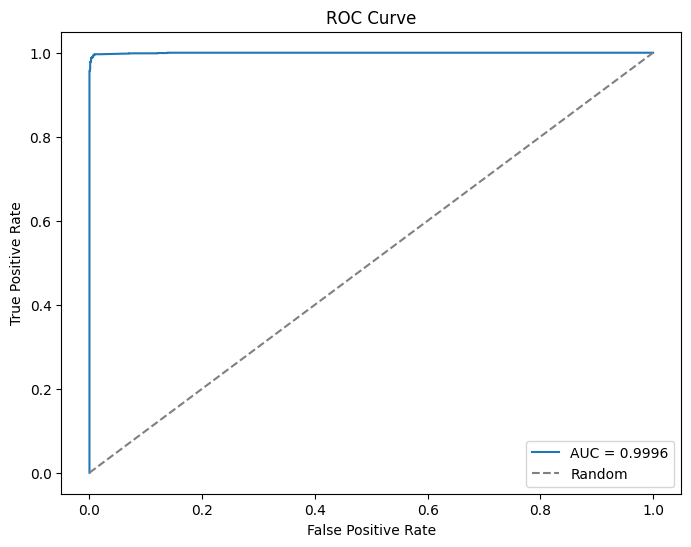

AUC: 0.9996


Classification Report:
              precision    recall  f1-score   support

           0     0.9933    0.9945    0.9939      2369
           1     0.9906    0.9885    0.9895      1389

    accuracy                         0.9923      3758
   macro avg     0.9919    0.9915    0.9917      3758
weighted avg     0.9923    0.9923    0.9923      3758

118/118 [==============================] - 0s 2ms/step
Confusion Matrix:
[[2361.    8.]
 [   9. 1380.]]


Accuracy: 0.9955
Precision: 0.9942
Recall: 0.9935
F1 Score: 0.9939




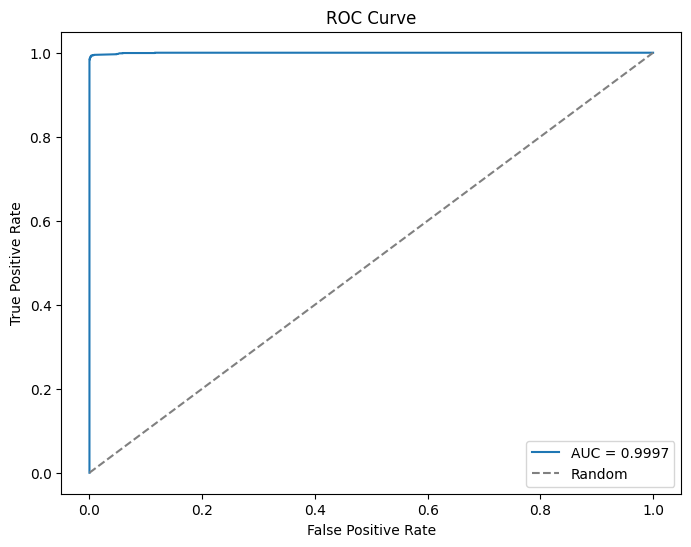

AUC: 0.9997


Classification Report:
              precision    recall  f1-score   support

           0     0.9962    0.9966    0.9964      2369
           1     0.9942    0.9935    0.9939      1389

    accuracy                         0.9955      3758
   macro avg     0.9952    0.9951    0.9951      3758
weighted avg     0.9955    0.9955    0.9955      3758

118/118 [==============================] - 0s 2ms/step
Confusion Matrix:
[[2364.    5.]
 [   6. 1382.]]


Accuracy: 0.9971
Precision: 0.9964
Recall: 0.9957
F1 Score: 0.9960




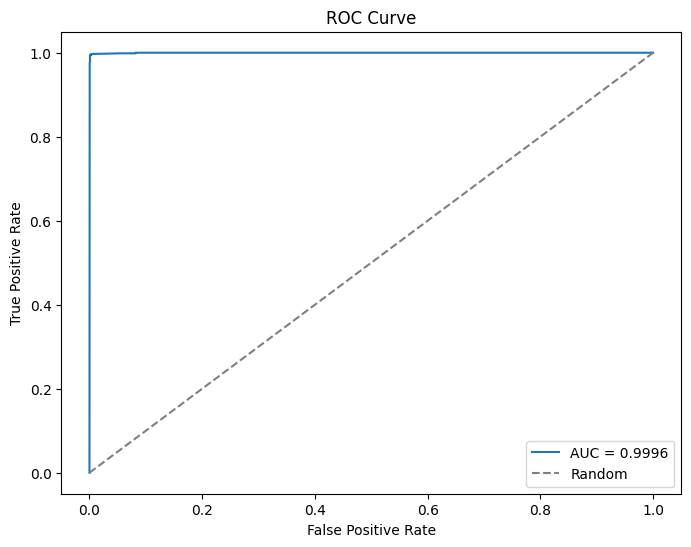

AUC: 0.9996


Classification Report:
              precision    recall  f1-score   support

           0     0.9975    0.9979    0.9977      2369
           1     0.9964    0.9957    0.9960      1388

    accuracy                         0.9971      3757
   macro avg     0.9969    0.9968    0.9969      3757
weighted avg     0.9971    0.9971    0.9971      3757

Average Scores Across All Folds:
Average Accuracy: 0.9933
Average Precision: 0.9924
Average Recall: 0.9896
Average F1 Score: 0.9910
Average AUC: 0.9992


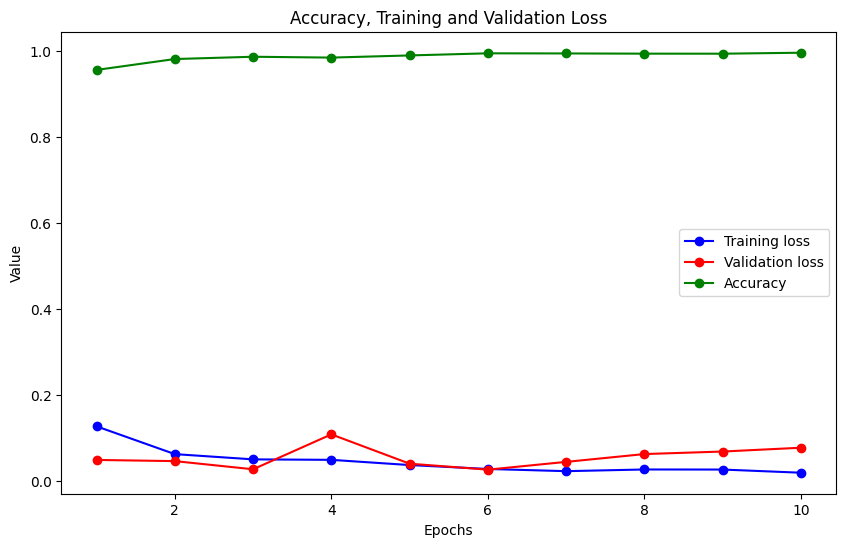

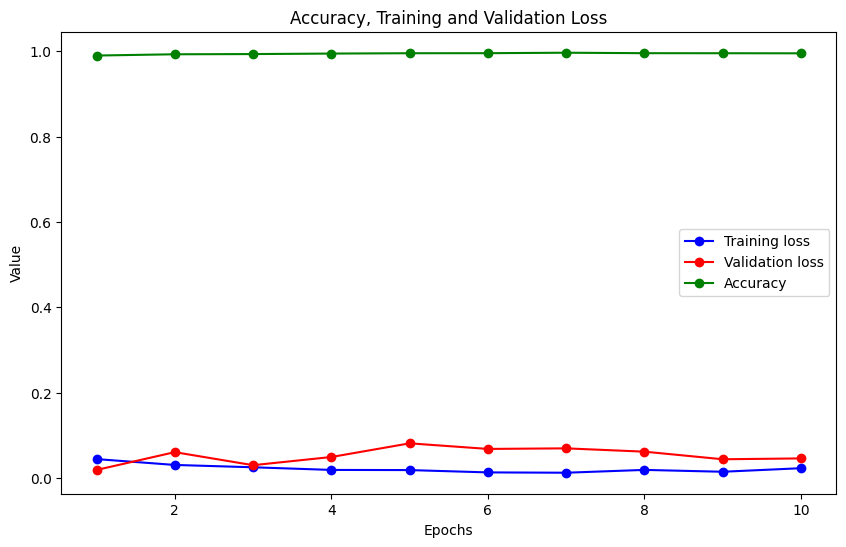

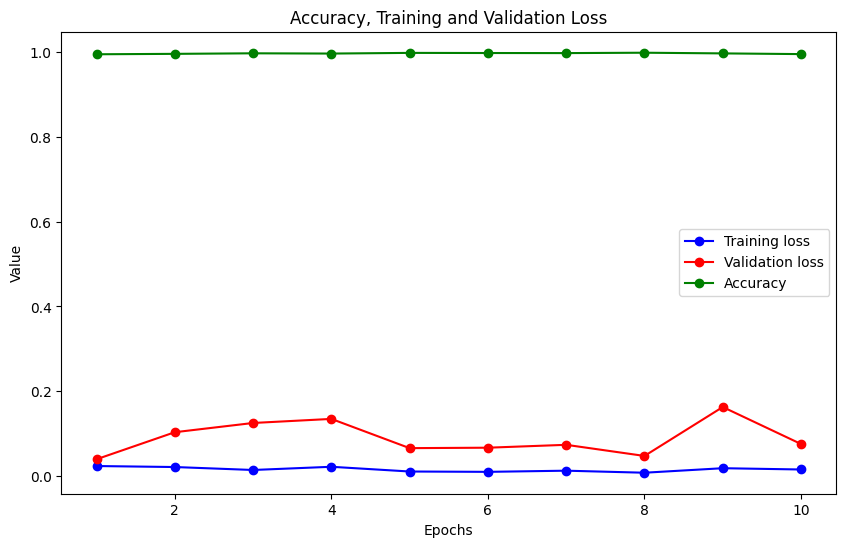

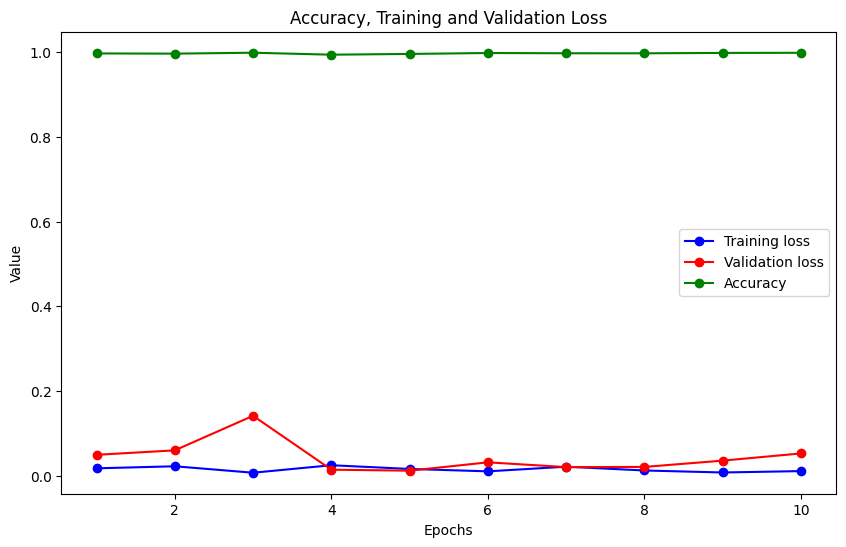

In [37]:
# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# To store fold-wise results
acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
auc_scores = []
# To store learning curves for each fold
folds_history = []

for train_index, val_index in cv.split(X, y):
    # Splitting the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Training the model on the training fold
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
    folds_history.append(history)

    # Evaluating the model on the validation fold
    y_pred = (model.predict(X_val_fold) > 0.5).astype(np.int32)
    y_prob = model.predict(X_val_fold)[:,0]

    evaluate_classification_model(y_val_fold, y_pred, y_prob)

    #Storing metrics to aggregate later
    acc_scores.append(accuracy_score(y_val_fold, y_pred))
    prec_scores.append(precision_score(y_val_fold, y_pred, average='binary'))
    rec_scores.append(recall_score(y_val_fold, y_pred, average='binary'))
    f1_scores.append(f1_score(y_val_fold, y_pred, average='binary'))
    auc_scores.append(roc_auc_score(y_val_fold, y_prob))

# Dsiplaying the average performance across all folds
print("Average Scores Across All Folds:")
print(f"Average Accuracy: {np.mean(acc_scores):.4f}")
print(f"Average Precision: {np.mean(prec_scores):.4f}")
print(f"Average Recall: {np.mean(rec_scores):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")
print(f"Average AUC: {np.mean(auc_scores):.4f}")

#Print all learning curves
for history in folds_history:
    plot_history_curve(history)

## **VISUALISING ALL ACCURACIES IN TERMS OF THE GRAPH**

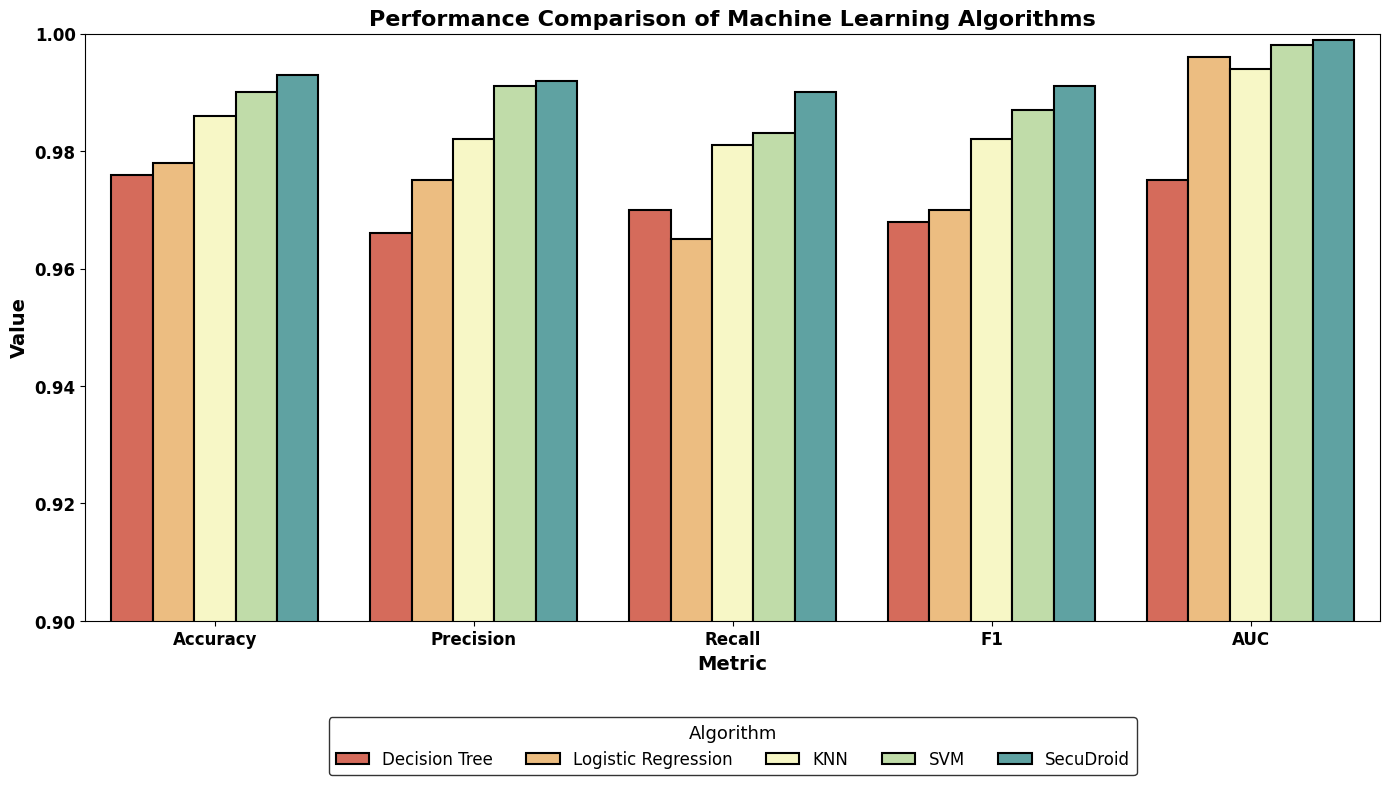

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Algorithm': ['Decision Tree', 'SVM', 'Logistic Regression', 'KNN', 'SecuDroid'],
    'Accuracy': [0.976, 0.990, 0.978, 0.986, 0.993],
    'Precision': [0.966, 0.991, 0.975, 0.982, 0.992],
    'Recall': [0.970, 0.983, 0.965, 0.981, 0.990],
    'F1': [0.968, 0.987, 0.970, 0.982, 0.991],
    'AUC': [0.975, 0.998, 0.996, 0.994, 0.999]
}

# Create DataFrame
df = pd.DataFrame(data)

# Melting the DataFrame
df_melted = df.melt(id_vars='Algorithm', var_name='Metric', value_name='Value')

# Calculate the mean performance for each algorithm
mean_scores = df.set_index('Algorithm').mean(axis=1).sort_values()

# Reorder the algorithms based on their mean performance
df_melted['Algorithm'] = pd.Categorical(df_melted['Algorithm'], categories=mean_scores.index, ordered=True)

# Plotting
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Metric', y='Value', hue='Algorithm', data=df_melted, palette='Spectral', edgecolor='black', linewidth=1.5)
plt.title('Performance Comparison of Machine Learning Algorithms', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Metric', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Value', fontsize=14, fontweight='bold', color='black')
plt.ylim(0.9, 1.0)  # Setting the Y-axis scale from 0.9 to 1.0
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.legend(title='Algorithm', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(df_melted['Algorithm'].unique()), title_fontsize='13', fontsize='12', edgecolor='black')
plt.tight_layout()
plt.show()